In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 데이터 가져오기

In [26]:
t_pit16=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2016.csv",encoding='utf-8',engine='python')
t_pit17=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2017.csv",encoding='utf-8',engine='python')
t_pit18=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2018.csv",encoding='utf-8',engine='python')
t_pit19=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2019.csv",encoding='utf-8',engine='python')

In [20]:
t_bat16=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2016.csv",encoding='utf-8',engine='python')
t_bat17=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2017.csv",encoding='utf-8',engine='python')
t_bat18=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2018.csv",encoding='utf-8',engine='python')
t_bat19=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2019.csv",encoding='utf-8',engine='python')

In [21]:
#모든 열 다 출력하기
pd.options.display.max_columns=None

In [27]:
#이닝수 변수 만들기
t_pit16['INN']=t_pit16['INN2']/3
t_pit17['INN']=t_pit17['INN2']/3
t_pit18['INN']=t_pit18['INN2']/3
t_pit19['INN']=t_pit19['INN2']/3

In [28]:
#1루타 변수 만들기
t_pit16['H1']=t_pit16['HIT']-t_pit16['H2']-t_pit16['H3']-t_pit16['HR']
t_pit17['H1']=t_pit17['HIT']-t_pit17['H2']-t_pit17['H3']-t_pit17['HR']
t_pit18['H1']=t_pit18['HIT']-t_pit18['H2']-t_pit18['H3']-t_pit18['HR']
t_pit19['H1']=t_pit19['HIT']-t_pit19['H2']-t_pit19['H3']-t_pit19['HR']

In [ ]:
#1루타 변수 만들기
t_bat16['H1']=t_bat16['HIT']-t_bat16['H2']-t_bat16['H3']-t_bat16['HR']
t_bat17['H1']=t_bat17['HIT']-t_bat17['H2']-t_bat17['H3']-t_bat17['HR']
t_bat18['H1']=t_bat18['HIT']-t_bat18['H2']-t_bat18['H3']-t_bat18['HR']
t_bat19['H1']=t_bat19['HIT']-t_bat19['H2']-t_bat19['H3']-t_bat19['HR']

In [ ]:
stats=['G_ID','T_ID', 'AB', 'H2', 'H3', 'HR', 'H1']
t_bat16=t_bat16.filter(stats)
t_bat17=t_bat17.filter(stats)
t_bat18=t_bat18.filter(stats)
t_bat19=t_bat19.filter(stats)

In [ ]:
t_pit16=pd.merge(t_pit16, t_bat16, on=['G_ID', 'T_ID'], suffixes=('','_my'))
t_pit17=pd.merge(t_pit17, t_bat17, on=['G_ID', 'T_ID'], suffixes=('','_my'))
t_pit18=pd.merge(t_pit18, t_bat18, on=['G_ID', 'T_ID'], suffixes=('','_my'))
t_pit19=pd.merge(t_pit19, t_bat19, on=['G_ID', 'T_ID'], suffixes=('','_my'))

In [29]:
t_pit19.columns

Index(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'CG_CK',
       'WLS', 'HOLD', 'INN2', 'BF', 'PA', 'AB', 'HIT', 'H2', 'H3', 'HR', 'SB',
       'CS', 'SH', 'SF', 'BB', 'IB', 'HP', 'KK', 'GD', 'WP', 'BK', 'ERR', 'R',
       'ER', 'P_WHIP_RT', 'P2_WHIP_RT', 'CB_WHIP_RT', 'INN', 'H1'],
      dtype='object')

## 2. train test 셋 만들기

In [11]:
team=['HH', 'HT', 'KT', 'LG', 'LT', 'NC', 'OB', 'SK', 'SS', 'WO']

In [12]:
pd.set_option('mode.chained_assignment',None) #chain copy warning 제거하기

#승률 변수만들기(이긴 경기, 진 경기 합치기)
def make_win_lose(data):
    data['W']=0; data['L']=0
    data['W'][data['WLS']=='W']=1
    data['L'][data['WLS']=='L']=1
    return data

In [13]:
data_list=[t_pit16,t_pit17,t_pit18,t_pit19]
for data in data_list:
    data=make_win_lose(data)

In [14]:
stats=['T_ID', 'HOLD', 'BF', 'PA', 'AB', 'HIT', 'H2', 'H3', 'HR', 'R','ER', 'P_WHIP_RT', 'CB_WHIP_RT', 'INN', 'H1','W','L','AB_my', 'H2_my', 'H3_my', 'HR_my', 'H1_my']
t16=t_pit16.filter(stats)
t17=t_pit17.filter(stats)
t18=t_pit18.filter(stats)
t19=t_pit19.filter(stats)

In [15]:
#정답 셋과 train 셋 만드는 함수
t_bat=[t16,t17,t18,t19]
def make_answer_train(year):
    a=t_bat[year-2016]  
    data=pd.DataFrame()  #빈 데이터프레임 만들기
    pa=pd.DataFrame()

    train_name=['train' + str(i) for i in range(1,6)]
    train_data=[pd.DataFrame() for var in train_name] #50경기씩 묶일 데이터셋
    
    ans_name=['ans' + str(i) for i in range(1,6)]
    answer=[pd.DataFrame() for var in ans_name]  #20경기씩 묶일 데이터셋
        
    for i in range(5):
        tra=train_data[i]
        ans=answer[i]
        for t in team:
            tra=pd.concat([tra,a[a['T_ID']==t][4+i*20:4+40+i*20]])      #팀별로 앞 4경기 제외
            ans=pd.concat([ans,a[a['T_ID']==t][4+40+i*20:4+60+i*20]])
        
        tra=tra.groupby(['T_ID']).sum()
        #SLG변수 만들기
        tra['SLG']=(tra['H1']+tra['H2']*2+tra['H3']*3+tra['HR']*4)/tra['AB']
        tra=tra.drop(['H1','H2','H3','HR'],axis='columns')
        
        #우리팀 SLG만들기
        tra['SLG_my']=(tra['H1_my']+tra['H2_my']*2+tra['H3_my']*3+tra['HR_my']*4)/tra['AB_my']
        tra=tra.drop(['H1_my','H2_my','H3_my','HR_my','AB_my'],axis='columns')
        
        #승률 변수 만들기
        tra['WINNING_RATE']=tra['W']/(tra['W']+tra['L'])
        tra=tra.drop(['W','L'],axis='columns')

        #팀별 AB,HIT합 구하기
        ans=ans.groupby(['T_ID']).sum()
        ans['ERA']=ans['ER']*9/ans['INN']     #방어율 계산
        ans=ans.drop(ans.columns[list(range(21))],axis='columns')
                
        if i <4:
            data=pd.concat([data,pd.merge(tra,ans,on='T_ID')])
        else:
            test_data=pd.merge(tra,ans,on='T_ID')
            
    return data,test_data

In [16]:
train16,test16=make_answer_train(2016)
train17,test17=make_answer_train(2017)
train18,test18=make_answer_train(2018)
train19,test19=make_answer_train(2019)

In [17]:
test19

,HOLD,BF,PA,AB,HIT,R,ER,P_WHIP_RT,CB_WHIP_RT,INN,SLG,SLG_my,WINNING_RATE,ERA
T_ID,,,,,,,,,,,,,,
HH,11,6178,1594,1400,418,229,213,68.646691,89.108442,350.000000,0.438571,0.367615,0.375000,3.262082
HT,21,5952,1536,1357,354,187,168,56.100703,64.287446,354.666667,0.372881,0.374439,0.487179,4.000000
KT,24,5697,1534,1381,363,164,156,51.916575,64.135606,357.333333,0.393193,0.396848,0.589744,3.254237
LG,17,6012,1575,1374,394,223,206,70.540360,77.255195,351.333333,0.420670,0.400583,0.475000,2.943609
LT,8,5767,1534,1353,386,202,179,54.240818,68.620779,348.000000,0.413895,0.362547,0.333333,3.568966
NC,18,5797,1527,1348,341,164,148,64.677689,60.314719,359.333333,0.359050,0.401171,0.512821,2.927103
OB,19,5704,1491,1344,343,153,143,61.734532,58.810048,357.000000,0.357887,0.416368,0.650000,3.405850
SK,28,5789,1504,1334,329,145,129,56.820238,78.019106,355.333333,0.342579,0.361798,0.575000,3.806391
SS,15,6018,1589,1384,383,210,190,60.547086,71.726798,354.333333,0.425578,0.355740,0.435897,4.680000


In [222]:
train678_9=pd.concat([train16,test16,train17,test17,train18,test18,train19])
train679_8=pd.concat([train16,test16,train17,test17,train19,test19,train18])
train689_7=pd.concat([train16,test16,train18,test18,train19,test19,train17])
train789_6=pd.concat([train17,test17,train18,test18,train19,test19,train16])

## 3. 모델학습

In [146]:
# 출력 할 때 마다, 기존 출력물들은 제거해주는 모듈
from IPython.display import clear_output

In [147]:
# 모델 모듈
import xgboost
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [205]:
var=['HOLD','BF','PA','AB','HIT','R','ER','P_WHIP_RT','CB_WHIP_RT','INN', 'SLG','SLG_my','WINNING_RATE']

In [206]:
X_cols=var
Y_col=['ERA']

In [207]:
#### 학습시킬 모델
model_dict = {'xgb':XGBRegressor(n_estimators=100, learning_rate=0.05 ,max_depth=3, random_state=23),
    'lgbm':LGBMRegressor(),
    'rf':RandomForestRegressor(),
    'svr':SVR(),
    'reg':LinearRegression(),
    'ridge':Ridge(alpha=100,normalize=True),
    'lasso':Lasso(alpha=0.05,normalize=True)}  #변수 자동 채택 / 많은 변수를 다룰때 활용

train678_9
train679_8
train689_7
train789_6

In [231]:
train=train789_6
test=test16

In [233]:
X_train = train[X_cols]; Y_train = train[Y_col]
X_test = test[X_cols]; Y_test = test[Y_col]
diff=[]

#모델 여러개 돌려보기
model_list=['xgb','lgbm','rf','svr','reg','ridge','lasso']

for m in model_list:
    model = model_dict[m]
    if m=='rf': Y_train=Y_train.values.ravel()  #rf에서의 오류 없애기 위함
    model.fit(X_train, Y_train)                  #, sample_weight=weight
    Y_predict = model.predict(X_test)

    r2=r2_score(Y_test, Y_predict)

    a=Y_test.assign(predict=Y_predict)
    a['diff']=a['ERA']-a['predict']
    print(m,"\t>r2 :", r2,'\ttrain점수 :{:.3f}'.format(model.score(X_train,Y_train)),"\t차이합 :",abs(a['diff']).sum())
    diff.append(r2)

xgb 	>r2 : 0.17661273477145611 	train점수 :0.723 	차이합 : 6.522837454481699
lgbm 	>r2 : -0.07850017155462319 	train점수 :0.857 	차이합 : 7.091680928317832
rf 	>r2 : -0.021457349971537365 	train점수 :0.884 	차이합 : 6.703060186008262
svr 	>r2 : -0.015731240584375694 	train점수 :0.066 	차이합 : 6.969422257473664
reg 	>r2 : 0.3012012432190464 	train점수 :0.252 	차이합 : 6.1472413999064734
ridge 	>r2 : 0.009827225283054242 	train점수 :0.018 	차이합 : 7.031149305127389
lasso 	>r2 : -0.011687621363460243 	train점수 :0.000 	차이합 : 7.121443776557756


In [128]:
#model = model_dict[model_list[diff.index(max(diff))]]  #r2가 가장 큰 모델 돌리기
model=model_dict['rf']                                  #rf 돌리기
if m=='rf': Y_train=Y_train.values.ravel()  #rf에서의 오류 없애기 위함
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)
print(model_list[diff.index(max(diff))])

reg


### 예측값과 실제값 차이

Text(0,0.5,'예측 값')

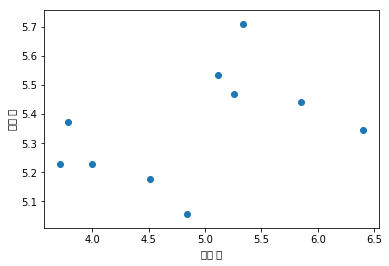

In [129]:
# 예측값과 실제값의 시각화
plt.scatter(Y_test, Y_predict)
plt.xlabel("실제 값")
plt.ylabel("예측 값")

In [130]:
#예측값과 실제값 차이
a=Y_test
a=a.assign(predict=Y_predict)
a['diff']=a['ERA']-a['predict']
a

,ERA,predict,diff
T_ID,,,
HH,5.340659,5.707890,-0.367231
HT,3.996205,5.227905,-1.231700
KT,6.398844,5.346791,1.052052
LG,3.786885,5.373565,-1.586680
LT,5.851711,5.441737,0.409974
NC,3.717391,5.228463,-1.511072
OB,4.508443,5.176472,-0.668029
SK,4.835821,5.057361,-0.221540
SS,5.259740,5.467627,-0.207887


In [131]:
#차이 합
abs(a['diff']).sum()

7.676315984077488